計測時間: 4.414s


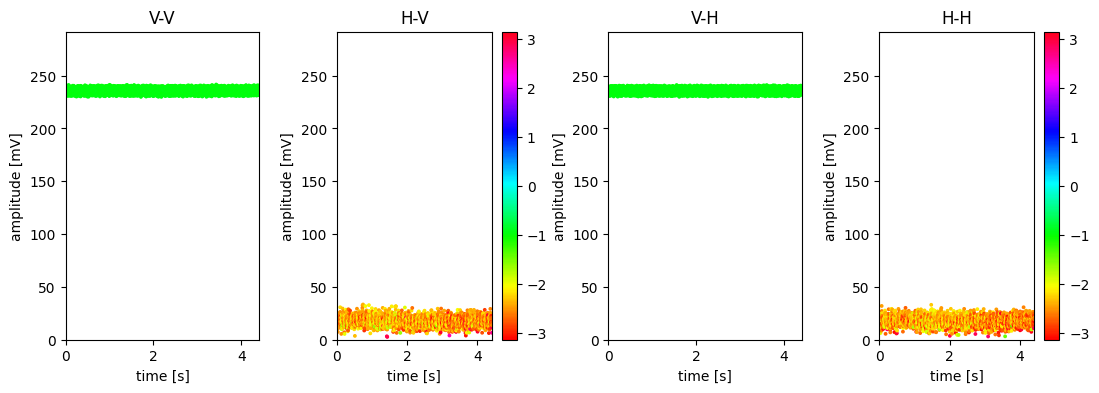

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os

date = '20221006'
action = 'air'
round = '2'
#ai = 45
#hp = 750
freq = 1000 # frequency [Hz]
#vmax =300

#Vo =[2475,2467,2503,2492]#0112
#Vo =[2474,2469,2503,2492,-2474,-2469,-2503,-2492]#0114-0119-0120

f = open(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), 'r')
df = np.genfromtxt(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), delimiter=",")  # np.genfromtxt()を使うと欠損値がnp.nanとして読み込まれる

df = (df-2048)/2048*250


#DCshift
m_num = df.shape[0] #計測回数
tmax = m_num/freq #計測時間



#Vo = df.mean(axis = 0)[1:9]
#print(Vo)

fig = plt.figure(figsize=(13, 4))  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)


# Tx1-Rx1 Svv=I1+jQ1
I1 = df[0::2, 0]
Q1 = df[0::2, 1]
A1 = np.sqrt((I1 **2 + Q1 ** 2))
P1=(np.arctan2(Q1,I1))
# Tx1-Rx2 Shv=I2+jQ2
I2 = df[0::2, 2]
Q2 = df[0::2, 3]
A2 = np.sqrt((I2 ** 2 + Q2 ** 2))
P2=(np.arctan2(Q2,I2))
# Tx2-Rx1 Svh=I3+jQ3
I3 = df[1::2, 0]
Q3 = df[1::2, 1]
A3 = np.sqrt((I3 ** 2 + Q3 ** 2))
P3=(np.arctan2(Q3,I3))
# Tx2-Rx2 Shh=I4+jQ4
I4 = df[1::2, 2]
Q4 = df[1::2, 3]
A4 = np.sqrt((I4 ** 2 + Q4 ** 2))
P4=(np.arctan2(Q4,I4))

vmax = max(A1.max(),A2.max(),A3.max(),A4.max())+50

t1= np.arange(0,np.size(A1))/freq*2
t2= np.arange(0,np.size(A3))/freq*2

print("計測時間: "+str(tmax)+"s")

#Tx1-Rx1
ax1 = fig.add_subplot(1, 4, 1)   #1行4列の1番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax1.scatter(t1, A1, c=P1, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
#fig.colorbar(mappable, ax=ax1 ) # カラーバーを付加
plt.title("V-V",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(0,vmax)

#Tx1-Rx2
ax2 = fig.add_subplot(1, 4, 2)   #1行4列の2番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax2.scatter(t1, A2, c=P2, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("H-V",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(0,vmax)

#Tx2-Rx1
ax3 = fig.add_subplot(1, 4, 3)   #1行4列の3番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax3.scatter(t2, A3, c=P3, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
#fig.colorbar(mappable, ax=ax2 ) # カラーバーを付加
plt.title("V-H",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(0,vmax)

#Tx2-Rx2
ax4 = fig.add_subplot(1, 4, 4)   #1行4列の4番目
cm = plt.cm.get_cmap('hsv') # カラーマップ
mappable = ax4.scatter(t2, A4, c=P4, vmin=-(np.pi), vmax=np.pi, s=3, cmap=cm)
fig.colorbar(mappable, ax=ax4 ) # カラーバーを付加
plt.title("H-H",fontsize=12)
plt.xlabel("time [s]", fontsize=10)
plt.ylabel("amplitude [mV]", fontsize=10)
plt.xlim(0,tmax)
plt.ylim(0,vmax)


plt.savefig(os.path.join(os.getcwd(),"../img","{0}_{1}_{2}_AmPh4_2Tx2Rx".format(date, action, round)))
plt.show()

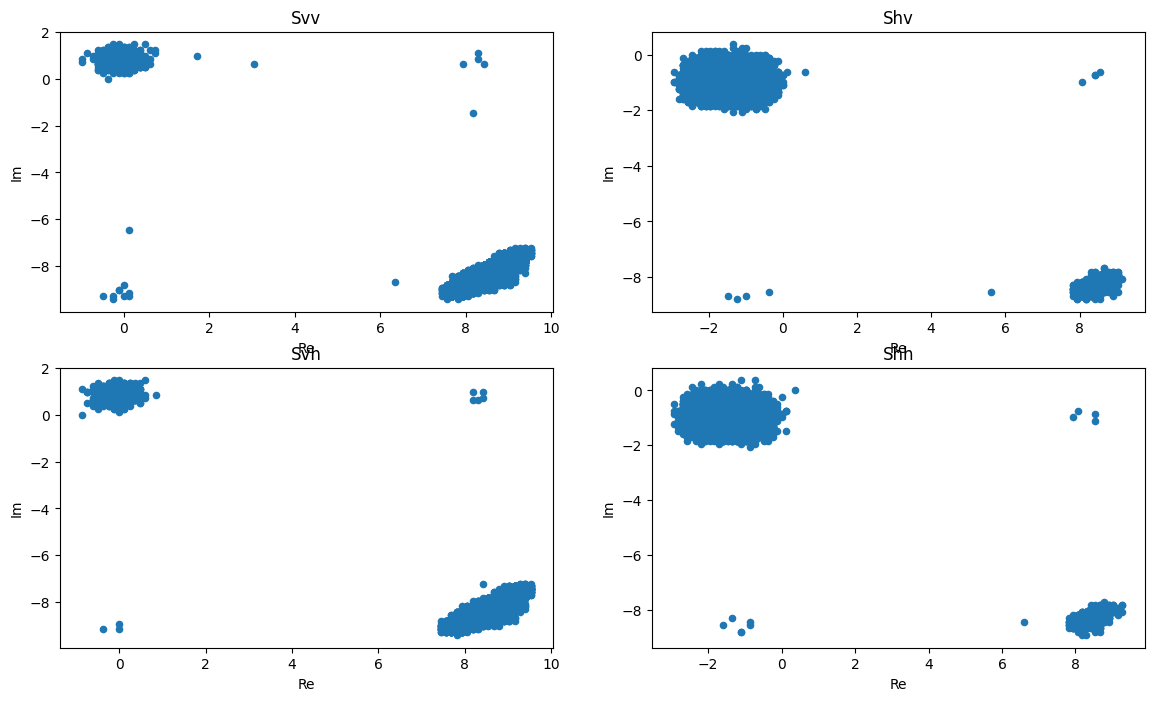

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os

date = '20221006'
action = 'air'
round = '1'

#Vo =[2475,2467,2503,2492]#0112
#Vo =[2474,2469,2503,2492,-2474,-2469,-2503,-2492]#0114

f = open(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), 'r')
df = np.genfromtxt(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), delimiter=",",)  # np.genfromtxt()を使うと欠損値がnp.nanとして読み込まれる
df = (df-2048)/2048*250

#print(type(df))
#Vo = df.mean(axis = 0)[1:9]
#print(Vo)

fig = plt.figure(figsize=(14, 8))

#t=df[:,0]/10.7


# Tx1-Rx1 Svv=I1+jQ1
I1 = df[0::2, 0]
Q1 = df[0::2, 1]
# Tx1-Rx2 Shv=I2+jQ2
I2 = df[0::2, 2]
Q2 = df[0::2, 3]
# Tx2-Rx1 Svh=I3+jQ3
I3 = df[1::2, 0]
Q3 = df[1::2, 1]
# Tx2-Rx2 Shh=I4+jQ4
I4 = df[1::2, 2]
Q4 = df[1::2, 3]

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Svv")
ax1.set_xlabel("Re")
ax1.set_ylabel("Im")
# ax1.set_xlim(0,10)
# ax1.set_ylim(2400,2700)
ax1.scatter(I1,Q1,s=20)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Shv")
ax2.set_xlabel("Re")
ax2.set_ylabel("Im")
# ax2.set_xlim(0,10)
# ax2.set_ylim(2400,2700)
ax2.scatter(I2,Q2,s=20)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Svh")
ax3.set_xlabel("Re")
ax3.set_ylabel("Im")
# ax3.set_xlim(0,10)
# ax3.set_ylim(2400,2700)
ax3.scatter(I3,Q3,s=20)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Shh")
ax4.set_xlabel("Re")
ax4.set_ylabel("Im")
# ax4.set_xlim(0,10)
# ax4.set_ylim(2400,2700)
ax4.scatter(I4,Q4,s=20)

plt.savefig(os.path.join(os.getcwd(),"../img","{0}_{1}_{2}_IQ4_2Tx2Rx".format(date, action, round)))
plt.show()